In [1]:
"""
Feature Analysis for Soccer MVPs:

# Feature 2-N - (SPI needs to be scaled otherwise games_played will take precendent over spi - i.e. a player can have a low spi and still do better than other players just because that player played more games - which doesn't make sense)
# SPI ^ (1-N)


Scaler range:
Scaler 1: .92-1
Scaler 2: .84-1
Scaler 3: .78-1
Scaler 4: .72-1
Scaler 5: .66-1
Scaler 6: .62-1
Scaler 7: .57-1
Scaler 8: .52-1
Scaler 9: .47-1
Scaler 10: .44-1


Who were the MLS MVP finalists for every year that includes Fotmob ratings?

Year
Finalists
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić
2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović
2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez
2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi
2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos
2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake
2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander



Analysis 1. Which scaler produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.

Year, scaler, first place, second place, third place
max scaler -> 15

Year, scaler, first place, second place, third place
2024, scaler: 13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5
Notes: Given the players spi's and games played, 7th place this the best Cucho can achieve.


2023, scaler: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3


2022, scaler: 1
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4


2021, scaler: 4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7



2020, scaler: 7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19

2019: scaler: 4
vela	0.916667
ibra	0.709110
martinez	0.619006


2018: scaler: 8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

2017: scaler: 3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

2016: scaler: 4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5


Analysis 2. Which scaler is closest to the ground truth above? Errors don't matter in this case; they just need to match as many players as possible. E.g. two players could be in there correct place, but one may be signifantly wrong.

4

Analysis 3: Determine the scaler to maker sure the first place contender from the ground truth is correct.

4

"""

In [2]:
import pandas as pd
from typing import Dict
import matplotlib.pyplot as plt

In [3]:
def create_mvp_analysis_dataframe(test_data: Dict[str, Dict[str, float]], meta_data: Dict[str, float], max_scaler: int):
    df = pd.DataFrame(test_data).T
    df["feature_0_games_played_normalized"] = df["games_played"] / meta_data["max_games_played_mls"]
    # for i in range(1, max_scaler):
    #     df[f"feature_{i}"] = df["spi"] ** i

    max_scaler += 1

    for i in range(1, max_scaler):
        df[f"feature_{i}"] = (df["spi"] ** i) / (df[f"spi"].loc[meta_data["player_with_max_spi_mls"]] ** i)
    return df

In [16]:
# 2024 MLS

In [17]:
test_data_mls_2024 = {
    "messi": {
        "spi": 8.29,
        "games_played": 22
    },
    "puig": {
        "spi": 8.17,
        "games_played": 33
    },
    "evander": {
        "spi": 8.06,
        "games_played": 29
    },
    "gauld": {
        "spi": 7.89,
        "games_played": 34
    },
    "pec": {
        "spi": 7.87,
        "games_played": 38
    },
    "acosta": {
        "spi": 7.85,
        "games_played": 35
    },
    "cucho": {
        "spi": 7.80,
        "games_played": 29
    },
    "gil": {
        "spi": 7.72,
        "games_played": 26
    },
    "bentenke": {
        "spi": 7.70,
        "games_played": 30
    },
    "gomez": {
        "spi": 7.68,
        "games_played": 23
    },
    "bounga": {
        "spi": 7.67,
        "games_played": 36
    },
    "forsberg": {
        "spi": 7.64,
        "games_played": 24
    },
    "bogusz": {
        "spi": 7.62,
        "games_played": 36
    },
    "mihlovic": {
        "spi": 7.62,
        "games_played": 30
    },
    "suarez": {
        "spi": 7.59,
        "games_played": 30
    },
    "painstil": {
        "spi": 7.55,
        "games_played": 34
    },
    "alba": {
        "spi": 7.54,
        "games_played": 31
    },
    "gazdag": {
        "spi": 7.51,
        "games_played": 30
    },
    "rodriguez": {
        "spi": 7.49,
        "games_played": 36
    },
    "torres": {
        "spi": 7.46,
        "games_played": 37
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2024[max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2024[max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2024, key=lambda x: test_data_mls_2024[x]["spi"])][0]
    }

In [18]:
mvp_mls_2024 = create_mvp_analysis_dataframe(test_data_mls_2024, meta_data, 30)

In [30]:
(mvp_mls_2024["feature_0_games_played_normalized"] * mvp_mls_2024["feature_28"]).sort_values(ascending=False)

,0
messi,0.578947
puig,0.577326
evander,0.347111
pec,0.233220
gauld,0.224039
acosta,0.200036
cucho,0.138591
bounga,0.107464
bentenke,0.099897
gil,0.093099


In [ ]:
"""
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander

Analysis 1:
13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5

Best scaler: 13

Analysis 2:
28
messi	0.578947
puig	0.577326
evander	0.347111
pec	0.233220
gauld	0.224039
acosta	0.200036
cucho	0.138591

Best scaler: 28

Analysis 3:
28
messi	0.578947
puig	0.577326
evander	0.347111
pec	0.233220
gauld	0.224039
acosta	0.200036
cucho	0.138591

Best scaler: 28
"""

In [26]:
# 2023

In [31]:
test_data_mls_2023 = {
    "gil": {
        "spi": 8.00,
        "games_played": 34
    },
    "zelarayan": {
        "spi": 7.93,
        "games_played": 20
    },
    "almada": {
        "spi": 7.87,
        "games_played": 33
    },
    "herrera": {
        "spi": 7.86,
        "games_played": 35
    },
    "cucho": {
        "spi": 7.85,
        "games_played": 33
    },
    "acosta": {
        "spi": 7.83,
        "games_played": 36
    },
    "puig": {
        "spi": 7.79,
        "games_played": 29
    },
    "bounga": {
        "spi": 7.71,
        "games_played": 36
    },
    "gauld": {
        "spi": 7.70,
        "games_played": 34
    },
    "wagner": {
        "spi": 7.66,
        "games_played": 29
    },
    "a. morris": {
        "spi": 7.66,
        "games_played": 36
    },
    "espinoza": {
        "spi": 7.62,
        "games_played": 35
    },
    "brugman": {
        "spi": 7.61,
        "games_played": 22
    },
    "lowen": {
        "spi": 7.59,
        "games_played": 31
    },
    "paulo": {
        "spi": 7.55,
        "games_played": 35
    },
    "barreal": {
        "spi": 7.55,
        "games_played": 38
    },
    "tolkin": {
        "spi": 7.52,
        "games_played": 30
    },
    "torres": {
        "spi": 7.51,
        "games_played": 33
    },
    "evander": {
        "spi": 7.48,
        "games_played": 27
    },
    "ferreira": {
        "spi": 7.46,
        "games_played": 29
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2023[max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2023[max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2023, key=lambda x: test_data_mls_2023[x]["spi"])][0]
    }

In [70]:
mvp_mls_2023 = create_mvp_analysis_dataframe(test_data_mls_2023, meta_data, 36)

In [71]:
mvp_mls_2023

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
gil,8.00,34.0,0.894737,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zelarayan,7.93,20.0,0.526316,0.99125,0.982577,0.973979,0.965457,0.957009,0.948635,0.940335,...,0.795725,0.788763,0.781861,0.775020,0.768238,0.761516,0.754853,0.748248,0.741701,0.735211
almada,7.87,33.0,0.868421,0.98375,0.967764,0.952038,0.936567,0.921348,0.906376,0.891648,...,0.653136,0.642522,0.632081,0.621810,0.611705,0.601765,0.591987,0.582367,0.572903,0.563594
herrera,7.86,35.0,0.921053,0.98250,0.965306,0.948413,0.931816,0.915509,0.899488,0.883747,...,0.631897,0.620839,0.609974,0.599300,0.588812,0.578508,0.568384,0.558437,0.548665,0.539063
cucho,7.85,33.0,0.868421,0.98125,0.962852,0.944798,0.927083,0.909700,0.892643,0.875906,...,0.611324,0.599862,0.588614,0.577578,0.566748,0.556122,0.545694,0.535463,0.525423,0.515571
acosta,7.83,36.0,0.947368,0.97875,0.957952,0.937595,0.917671,0.898171,0.879085,0.860404,...,0.572092,0.559935,0.548037,0.536391,0.524993,0.513837,0.502918,0.492231,0.481771,0.471533
puig,7.79,29.0,0.763158,0.97375,0.948189,0.923299,0.899062,0.875462,0.852481,0.830104,...,0.500765,0.487620,0.474820,0.462356,0.450219,0.438401,0.426893,0.415687,0.404775,0.394150
bounga,7.71,36.0,0.947368,0.96375,0.928814,0.895145,0.862696,0.831423,0.801284,0.772237,...,0.382890,0.369010,0.355634,0.342742,0.330318,0.318344,0.306804,0.295682,0.284964,0.274634
gauld,7.70,34.0,0.894737,0.96250,0.926406,0.891666,0.858229,0.826045,0.795068,0.765253,...,0.370185,0.356303,0.342942,0.330082,0.317704,0.305790,0.294323,0.283286,0.272662,0.262437
wagner,7.66,29.0,0.763158,0.95750,0.916806,0.877842,0.840534,0.804811,0.770607,0.737856,...,0.323302,0.309562,0.296405,0.283808,0.271746,0.260197,0.249139,0.238550,0.228412,0.218704


In [75]:
# What is the minimum scaler to achieve ground truth results?
# 2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga

"""
Analysis 1:

2
acosta	0.907533 Y
gil	0.894737
barreal	0.890664
herrera	0.889098
bounga	0.879929 N,+2
a. morris	0.868553
almada	0.840427 N,+5



3
gil	0.894737
acosta	0.888248 N+1
herrera	0.873539
bounga	0.848032 N+1
barreal	0.840564
a. morris	0.831640
almada	0.826770 N+5



4
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3



8
gil	0.894737
herrera	0.799733
acosta	0.797798 N+2
almada	0.761743 N+2
cucho	0.746393
bounga	0.705073 N+3


Difference between my results and ground truth
-- 8: 7
-- 4: 5
-- 3: 7
-- 2: 7

Best scaler: 4


Analysis 2:
2
acosta	0.907533
gil	0.894737
barreal	0.890664
herrera	0.889098
bounga	0.879929
a. morris	0.868553
almada	0.840427

Best scaler: 2


Analysis 3:
2
acosta	0.907533
gil	0.894737
barreal	0.890664
herrera	0.889098
bounga	0.879929
a. morris	0.868553
almada	0.840427

Best scaler: 2

"""


(mvp_mls_2023["feature_0_games_played_normalized"] * mvp_mls_2023["feature_35"]).sort_values(ascending=False)

,0
gil,0.894737
herrera,0.496505
almada,0.489437
cucho,0.447733
acosta,0.446716
zelarayan,0.386953
puig,0.300799
bounga,0.260179
gauld,0.234812
a. morris,0.207194


In [11]:
# 2022

In [79]:
test_data_mls_2022 = {
    "gil": {
        "spi": 8.00,
        "games_played": 33
    },
    "muhktar": {
        "spi": 7.93,
        "games_played": 34
    },
    "reynoso": {
        "spi": 7.87,
        "games_played": 29
    },
    "zelarayan": {
        "spi": 7.86,
        "games_played": 29
    },
    "acosta": {
        "spi": 7.85,
        "games_played": 32
    },
    "driussi": {
        "spi": 7.83,
        "games_played": 37
    },
    "almada": {
        "spi": 7.79,
        "games_played": 29
    },
    "rubio": {
        "spi": 7.71,
        "games_played": 30
    },
    "pozuelo": {
        "spi": 7.70,
        "games_played": 29
    },
    "gazdag": {
        "spi": 7.66,
        "games_played": 37
    },
    "mihailovic": {
        "spi": 7.66,
        "games_played": 29
    },
    "wagner": {
        "spi": 7.62,
        "games_played": 36
    },
    "osorio": {
        "spi": 7.61,
        "games_played": 23
    },
    "vela": {
        "spi": 7.59,
        "games_played": 35
    },
    "moralez": {
        "spi": 7.55,
        "games_played": 32
    },
    "savarino": {
        "spi": 7.55,
        "games_played": 20
    },
    "lodeiro": {
        "spi": 7.52,
        "games_played": 28
    },
    "ferreira": {
        "spi": 7.51,
        "games_played": 34
    },
    "nwobodo": {
        "spi": 7.48,
        "games_played": 26
    },
    "blake": {
        "spi": 7.07,
        "games_played": 37
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2022[max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2022[max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2022, key=lambda x: test_data_mls_2022[x]["spi"])][0]
    }

In [97]:
mvp_mls_2022 = create_mvp_analysis_dataframe(test_data_mls_2022, meta_data, 31)

In [98]:
mvp_mls_2022

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
gil,8.00,33.0,0.891892,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
muhktar,7.93,34.0,0.918919,0.99125,0.982577,0.973979,0.965457,0.957009,0.948635,0.940335,...,0.831471,0.824196,0.816984,0.809835,0.802749,0.795725,0.788763,0.781861,0.775020,0.768238
reynoso,7.87,29.0,0.783784,0.98375,0.967764,0.952038,0.936567,0.921348,0.906376,0.891648,...,0.708891,0.697372,0.686040,0.674891,0.663924,0.653136,0.642522,0.632081,0.621810,0.611705
zelarayan,7.86,29.0,0.783784,0.98250,0.965306,0.948413,0.931816,0.915509,0.899488,0.883747,...,0.690214,0.678135,0.666268,0.654608,0.643153,0.631897,0.620839,0.609974,0.599300,0.588812
acosta,7.85,32.0,0.864865,0.98125,0.962852,0.944798,0.927083,0.909700,0.892643,0.875906,...,0.672006,0.659406,0.647042,0.634910,0.623005,0.611324,0.599862,0.588614,0.577578,0.566748
driussi,7.83,37.0,1.000000,0.97875,0.957952,0.937595,0.917671,0.898171,0.879085,0.860404,...,0.636953,0.623418,0.610170,0.597204,0.584513,0.572092,0.559935,0.548037,0.536391,0.524993
almada,7.79,29.0,0.783784,0.97375,0.948189,0.923299,0.899062,0.875462,0.852481,0.830104,...,0.572001,0.556986,0.542365,0.528128,0.514265,0.500765,0.487620,0.474820,0.462356,0.450219
rubio,7.71,30.0,0.810811,0.96375,0.928814,0.895145,0.862696,0.831423,0.801284,0.772237,...,0.460524,0.443830,0.427741,0.412235,0.397292,0.382890,0.369010,0.355634,0.342742,0.330318
pozuelo,7.70,29.0,0.783784,0.96250,0.926406,0.891666,0.858229,0.826045,0.795068,0.765253,...,0.448142,0.431337,0.415161,0.399593,0.384608,0.370185,0.356303,0.342942,0.330082,0.317704
gazdag,7.66,37.0,1.000000,0.95750,0.916806,0.877842,0.840534,0.804811,0.770607,0.737856,...,0.401712,0.384639,0.368292,0.352639,0.337652,0.323302,0.309562,0.296405,0.283808,0.271746


In [131]:
"""
Analysis 1:

2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake

1
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4

2
driussi	0.957952 N+1
gazdag	0.916806
muhktar	0.902908 N+2
gil	0.891892
wagner	0.882736
vela	0.851471
acosta	0.832736
ferreira	0.809799
blake	0.781014 N+6



-- 1: 8
-- 2: 9

Best scaler: 1





Analysis 2:

gil	0.891892
driussi	0.879085
muhktar	0.871719
acosta	0.772016
gazdag	0.770607
wagner	0.726592
reynoso	0.710403
zelarayan	0.705004
vela	0.689886
almada	0.668161
rubio	0.649690
ferreira	0.628893
pozuelo	0.623162
moralez	0.611069
mihailovic	0.603989
lodeiro	0.522064
blake	0.476405

Best scaler: 6





Analysis 3: (best muhktar can do is 2nd place)
gil	0.891892
muhktar	0.864091
driussi	0.860404
acosta	0.757541
gazdag	0.737856
reynoso	0.698859
zelarayan	0.692667
wagner	0.692079
vela	0.654529
almada	0.650622
rubio	0.626138
pozuelo	0.599793
ferreira	0.590373
mihailovic	0.578319
moralez	0.576696
lodeiro	0.490740
nwobodo	0.438988
osorio	0.438116
blake	0.421023

Best scaler: 7
"""

(mvp_mls_2022["feature_0_games_played_normalized"] * mvp_mls_2022["feature_6"]).sort_values(ascending=False)

,0
gil,0.891892
driussi,0.879085
muhktar,0.871719
acosta,0.772016
gazdag,0.770607
wagner,0.726592
reynoso,0.710403
zelarayan,0.705004
vela,0.689886
almada,0.668161


In [132]:
# 2021

In [3]:
test_data_mls_2021 = {
    "gil": {
        "spi": 8.14,
        "games_played": 29
    },
    "muhktar": {
        "spi": 7.77,
        "games_played": 33
    },
    "paulo": {
        "spi": 7.80,
        "games_played": 32
    },
    "atuesta": {
        "spi": 7.73,
        "games_played": 24
    },
    "moreno": {
        "spi": 7.65,
        "games_played": 33
    },
    "chicarito": {
        "spi": 7.64,
        "games_played": 21
    },
    "reynoso": {
        "spi": 7.62,
        "games_played": 30
    },
    "russell": {
        "spi": 7.60,
        "games_played": 32
    },
    "rusnak": {
        "spi": 7.58,
        "games_played": 35
    },
    "salloi": {
        "spi": 7.57,
        "games_played": 32
    },
    "chara": {
        "spi": 7.56,
        "games_played": 34
    },
    "price": {
        "spi": 7.55,
        "games_played": 31
    },
    "fragapane": {
        "spi": 7.55,
        "games_played": 20
    },
    "bou": {
        "spi": 7.55,
        "games_played": 31
    },
    "moralez": {
        "spi": 7.54,
        "games_played": 34
    },
    "davis": {
        "spi": 7.52,
        "games_played": 35
    },
    "nathan": {
        "spi": 7.52,
        "games_played": 20
    },
    "ferreira": {
        "spi": 7.53,
        "games_played": 27
    },
    "barco": {
        "spi": 7.48,
        "games_played": 26
    },
    "monteiro": {
        "spi": 7.53,
        "games_played": 29
    },
    "castellanos":
        {
        "spi": 7.52,
        "games_played": 35
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2021[max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2021[max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2021, key=lambda x: test_data_mls_2021[x]["spi"])][0]
    }

In [4]:
mvp_mls_2021 = create_mvp_analysis_dataframe(test_data_mls_2021, meta_data, 16)

In [5]:
mvp_mls_2021

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
gil,8.14,29.0,0.828571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
muhktar,7.77,33.0,0.942857,0.954545,0.911157,0.869741,0.830207,0.792470,0.756449,0.722065,0.689244,0.657915,0.628009,0.599464,0.572215,0.546205,0.521378,0.497679
paulo,7.80,32.0,0.914286,0.958231,0.918207,0.879854,0.843103,0.807888,0.774143,0.741808,0.710823,0.681133,0.652683,0.625421,0.599297,0.574265,0.550279,0.527294
atuesta,7.73,24.0,0.685714,0.949631,0.901800,0.856378,0.813243,0.772281,0.733382,0.696443,0.661364,0.628052,0.596418,0.566377,0.537850,0.510759,0.485033,0.460603
moreno,7.65,33.0,0.942857,0.939803,0.883231,0.830063,0.780096,0.733137,0.689005,0.647529,0.608550,0.571917,0.537490,0.505135,0.474727,0.446151,0.419294,0.394054
chicarito,7.64,21.0,0.600000,0.938575,0.880923,0.826812,0.776025,0.728358,0.683618,0.641627,0.602215,0.565224,0.530505,0.497919,0.467334,0.438628,0.411685,0.386397
reynoso,7.62,30.0,0.857143,0.936118,0.876317,0.820336,0.767931,0.718874,0.672951,0.629961,0.589718,0.552046,0.516780,0.483767,0.452863,0.423933,0.396851,0.371500
russell,7.60,32.0,0.914286,0.933661,0.871723,0.813893,0.759901,0.709489,0.662423,0.618478,0.577449,0.539141,0.503375,0.469982,0.438804,0.409694,0.382515,0.357139
rusnak,7.58,35.0,1.000000,0.931204,0.867141,0.807485,0.751933,0.700203,0.652032,0.607175,0.565403,0.526506,0.490284,0.456555,0.425146,0.395897,0.368661,0.343299
salloi,7.57,32.0,0.914286,0.929975,0.864854,0.804293,0.747973,0.695596,0.646888,0.601590,0.559464,0.520287,0.483854,0.449973,0.418464,0.389161,0.361910,0.336567


In [9]:
"""
Analysis 1:

2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos

1
rusnak	0.931204
davis	0.923833
castellanos	0.923833 N+2
chara	0.902211
muhktar	0.900000 N+3
moralez	0.899824
moreno	0.886100
paulo	0.876097 N+5
russell	0.853633
salloi	0.850263 N+6
gil	0.828571 N+10

3
gil	0.828571 Y
muhktar	0.820041 Y
rusnak	0.807485
paulo	0.804438 N+1
davis	0.788461
castellanos	0.788461 N+1
moreno	0.782631
chara	0.778221
moralez	0.772061
russell	0.744131
salloi	0.735354 N+7


4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7


8
gil	0.828571 Y
paulo	0.649895 N+1
muhktar	0.649859 N+1
moreno	0.573776
rusnak	0.565403
chara	0.537762
castellanos	0.530576 N+2
davis	0.530576
russell	0.527953
moralez	0.526485
salloi	0.511510 N+7


9
gil	0.828571 Y
paulo	0.622750 N+1
muhktar	0.620319 N+1
moreno	0.539236
rusnak	0.526506
chara	0.499445
russell	0.492929
castellanos	0.490163 N+3
davis	0.490163
moralez	0.487678
salloi	0.475691 N+7

10
gil	0.828571 Y
paulo	0.596738 N+1
muhktar	0.592123 N+1
moreno	0.506776
rusnak	0.490284
chara	0.463858
russell	0.460229
castellanos	0.452829 N+3
davis	0.452829
moralez	0.451731
reynoso	0.442954
salloi	0.442381 N+8


11
gil	0.828571 Y
paulo	0.596738 N+1
muhktar	0.592123 N+1
moreno	0.506776
rusnak	0.490284
chara	0.463858
russell	0.460229
castellanos	0.452829 N+3
davis	0.452829
moralez	0.451731
reynoso	0.442954
salloi	0.442381 N+8


15
gil	0.828571 Y
paulo	0.482098 N+1
muhktar	0.469240 N+1
moreno	0.371536
rusnak	0.343299
russell	0.326527
chara	0.320532
reynoso	0.318428
atuesta	0.315842
moralez	0.308046
salloi	0.307719 N+7
davis	0.304720
castellanos	0.304720 N+8





Best Scalar: 4



Analysis 2:
4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7

Best Scalar: 4


Analysis 3:
4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7

Best Scalar: 4


"""

(mvp_mls_2021["feature_0_games_played_normalized"] * mvp_mls_2021["feature_3"]).sort_values(ascending=False)

,0
gil,0.828571
muhktar,0.820041
rusnak,0.807485
paulo,0.804438
davis,0.788461
castellanos,0.788461
moreno,0.782631
chara,0.778221
moralez,0.772061
russell,0.744131


In [21]:
# 2020


In [22]:
test_data_mls_2020 = {
    "blake": {
        "spi": 6.84,
        "games_played": 25
    },
    "rossi": {
        "spi": 7.62,
        "games_played": 21
    },
    "lodiero": {
        "spi": 7.62,
        "games_played": 25
    },
    "pulido": {
        "spi": 7.60,
        "games_played": 14
    },
    "pozuelo": {
        "spi": 7.55,
        "games_played": 25
    },
    "reynoso": {
        "spi": 7.54,
        "games_played": 30
    },
    "molino": {
        "spi": 7.48,
        "games_played": 22
    },
    "quintero": {
        "spi": 7.41,
        "games_played": 22
    },
    "morris": {
        "spi": 7.38,
        "games_played": 27
    },
    "valeri": {
        "spi": 7.37,
        "games_played": 27
    },
    "santos": {
        "spi": 7.36,
        "games_played": 26
    },
    "nani": {
        "spi": 7.36,
        "games_played": 25
    },
    "namli": {
        "spi": 7.32,
        "games_played": 18
    },
    "pavon": {
        "spi": 7.32,
        "games_played": 22
    },
    "ruidiaz": {
        "spi": 7.30,
        "games_played": 22
    },
    "zardes": {
        "spi": 7.27,
        "games_played": 26
    },
    "zelarayan": {
        "spi": 7.27,
        "games_played": 21
    },
    "paulo": {
        "spi": 7.23,
        "games_played": 23
    },
    "russell": {
        "spi": 7.21,
        "games_played": 25
    },
    "przybylko": {
        "spi": 7.21,
        "games_played": 27
    },
    "lod":
        {
        "spi": 7.18,
        "games_played": 30
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2020[max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2020[max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2020, key=lambda x: test_data_mls_2020[x]["spi"])][0]
    }

In [29]:
mvp_mls_2020 = create_mvp_analysis_dataframe(test_data_mls_2020, meta_data, 30)

In [30]:
mvp_mls_2020

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
blake,6.84,25.0,0.833333,0.897638,0.805754,0.723275,0.649239,0.582781,0.523127,0.469578,...,0.103544,0.092945,0.083431,0.074891,0.067225,0.060343,0.054166,0.048622,0.043645,0.039177
rossi,7.62,21.0,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
lodiero,7.62,25.0,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
pulido,7.60,14.0,0.466667,0.997375,0.994758,0.992147,0.989543,0.986945,0.984355,0.981771,...,0.946305,0.943821,0.941344,0.938873,0.936409,0.933951,0.931500,0.929055,0.926616,0.924184
pozuelo,7.55,25.0,0.833333,0.990814,0.981712,0.972693,0.963758,0.954904,0.946132,0.937441,...,0.823819,0.816251,0.808752,0.801323,0.793962,0.786668,0.779441,0.772281,0.765187,0.758157
reynoso,7.54,30.0,1.000000,0.989501,0.979113,0.968833,0.958662,0.948597,0.938638,0.928784,...,0.801205,0.792794,0.784470,0.776235,0.768085,0.760021,0.752042,0.744147,0.736334,0.728603
molino,7.48,22.0,0.733333,0.981627,0.963592,0.945888,0.928510,0.911451,0.894705,0.878267,...,0.677453,0.665006,0.652788,0.640795,0.629022,0.617465,0.606120,0.594984,0.584053,0.573322
quintero,7.41,22.0,0.733333,0.972441,0.945641,0.919580,0.894238,0.869593,0.845628,0.822323,...,0.556068,0.540743,0.525841,0.511349,0.497257,0.483553,0.470227,0.457268,0.444666,0.432411
morris,7.38,27.0,0.900000,0.968504,0.938000,0.908457,0.879844,0.852132,0.825293,0.799300,...,0.510657,0.494573,0.478996,0.463910,0.449298,0.435147,0.421442,0.408168,0.395312,0.382862
valeri,7.37,27.0,0.900000,0.967192,0.935460,0.904769,0.875085,0.846375,0.818606,0.791749,...,0.496321,0.480038,0.464288,0.449056,0.434323,0.420074,0.406292,0.392962,0.380069,0.367600


In [88]:
"""
Analysis 1:

2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi


1
reynoso	0.989501
lod	0.942257
morris	0.871654 N+1
valeri	0.870472
przybylko	0.851575
santos	0.837095
lodiero	0.833333 N+4
zardes	0.826859
pozuelo	0.825678 N+9
nani	0.804899
russell	0.788495
blake	0.748031 N+10
paulo	0.727428
molino	0.719860
quintero	0.713123
pavon	0.704462
ruidiaz	0.702537
rossi	0.700000 N+13


7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19



8
reynoso	0.853583
lodiero	0.833333 N+1
pozuelo	0.725602 N+2
rossi	0.700000 N+1
morris	0.556882 N+1
molino	0.555266
valeri	0.545670
santos	0.514867
nani	0.495064
quintero	0.482225
pulido	0.448628
zardes	0.428098
lod	0.409772
pavon	0.401461
przybylko	0.392597
ruidiaz	0.385318
russell	0.363516
paulo	0.348623
zelarayan	0.345772
namli	0.328468
blake	0.164944 N+19


Best scalar: 7








Analysis 2:
5
reynoso	0.948597
lodiero	0.833333
pozuelo	0.795754
morris	0.766919 Y
valeri	0.761737
lod	0.742758
santos	0.728562
nani	0.700540
rossi	0.700000
zardes	0.685093
przybylko	0.682565
molino	0.668397
quintero	0.637702
russell	0.632005
pavon	0.599904
ruidiaz	0.591754
paulo	0.589553
zelarayan	0.553344
namli	0.490831
blake	0.485651

Best scalar: 5




Analysis 3:
4
reynoso	0.958662
lodiero	0.833333
pozuelo	0.803132
morris	0.791859
lod	0.788275
valeri	0.787576
santos	0.754299
nani	0.725287
przybylko	0.721379
zardes	0.718075
rossi	0.700000
molino	0.680907
russell	0.667944
quintero	0.655774
pavon	0.624491
paulo	0.621355
ruidiaz	0.617693
zelarayan	0.579984
blake	0.541032

Best scalar: 4 (The best Pozuelo can do is finish 3rd)

2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi


"""
(mvp_mls_2020["feature_0_games_played_normalized"] * mvp_mls_2020["feature_9"]).sort_values(ascending=False)

,0
reynoso,0.909384
lodiero,0.833333
pozuelo,0.766914
rossi,0.700000
morris,0.674769
valeri,0.666584
santos,0.634100
molino,0.620613
nani,0.609711
lod,0.585498


In [26]:
# 2019


In [97]:
test_data_mls_2019 = {
    "vela": {
        "spi": 8.44,
        "games_played": 33
    },
    "ibra": {
        "spi": 8.04,
        "games_played": 31
    },
    "martinez": {
        "spi": 7.71,
        "games_played": 32
    },
    "atuesta": {
        "spi": 7.62,
        "games_played": 32
    },
    "gil": {
        "spi": 7.53,
        "games_played": 35
    },
    "moralez": {
        "spi": 7.46,
        "games_played": 30
    },
    "pozuelo": {
        "spi": 7.46,
        "games_played": 34
    },
    "lodiero": {
        "spi": 7.45,
        "games_played": 32
    },
    "rossi": {
        "spi": 7.45,
        "games_played": 36
    },
    "gegus": {
        "spi": 7.37,
        "games_played": 31
    },
    "przybylko": {
        "spi": 7.36,
        "games_played": 26
    },
    "rusnak": {
        "spi": 7.32,
        "games_played": 31
    },
    "moreira": {
        "spi": 7.31,
        "games_played": 27
    },
    "monteiro": {
        "spi": 7.31,
        "games_played": 28
    },
    "valeri": {
        "spi": 7.31,
        "games_played": 32
    },
    "morris": {
        "spi": 7.29,
        "games_played": 30
    },
    "nani": {
        "spi": 7.29,
        "games_played": 30
    },
    "ruidiaz": {
        "spi": 7.28,
        "games_played": 22
    },
    "kaye": {
        "spi": 7.26,
        "games_played": 32
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2019[max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2019[max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2019, key=lambda x: test_data_mls_2019[x]["spi"])][0]
    }

In [98]:
mvp_mls_2019 = create_mvp_analysis_dataframe(test_data_mls_2019, meta_data, 30)

In [99]:
mvp_mls_2019

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
vela,8.44,33.0,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ibra,8.04,31.0,0.861111,0.952607,0.907459,0.864452,0.823483,0.784455,0.747277,0.711861,...,0.360733,0.343636,0.327350,0.311836,0.297057,0.282979,0.269567,0.256792,0.244621,0.233028
martinez,7.71,32.0,0.888889,0.913507,0.834495,0.762317,0.696382,0.636150,0.581128,0.530864,...,0.149607,0.136667,0.124846,0.114048,0.104183,0.095172,0.086941,0.079421,0.072551,0.066276
atuesta,7.62,32.0,0.888889,0.902844,0.815127,0.735932,0.664431,0.599878,0.541596,0.488976,...,0.116913,0.105554,0.095299,0.086040,0.077681,0.070134,0.063320,0.057168,0.051613,0.046599
gil,7.53,35.0,0.972222,0.892180,0.795985,0.710162,0.633593,0.565279,0.504330,0.449954,...,0.091097,0.081275,0.072512,0.064694,0.057718,0.051495,0.045943,0.040989,0.036570,0.032627
moralez,7.46,30.0,0.833333,0.883886,0.781255,0.690540,0.610359,0.539488,0.476846,0.421478,...,0.074873,0.066179,0.058495,0.051703,0.045699,0.040393,0.035703,0.031557,0.027893,0.024654
pozuelo,7.46,34.0,0.944444,0.883886,0.781255,0.690540,0.610359,0.539488,0.476846,0.421478,...,0.074873,0.066179,0.058495,0.051703,0.045699,0.040393,0.035703,0.031557,0.027893,0.024654
lodiero,7.45,32.0,0.888889,0.882701,0.779162,0.687767,0.607093,0.535882,0.473024,0.417539,...,0.072793,0.064255,0.056718,0.050065,0.044192,0.039009,0.034433,0.030394,0.026829,0.023682
rossi,7.45,36.0,1.000000,0.882701,0.779162,0.687767,0.607093,0.535882,0.473024,0.417539,...,0.072793,0.064255,0.056718,0.050065,0.044192,0.039009,0.034433,0.030394,0.026829,0.023682
gegus,7.37,31.0,0.861111,0.873223,0.762518,0.665848,0.581434,0.507721,0.443354,0.387146,...,0.058026,0.050670,0.044246,0.038637,0.033739,0.029461,0.025726,0.022465,0.019617,0.017130


In [100]:
"""
Analysis 1:

2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez


4
vela	0.916667
ibra	0.709110
martinez	0.619006

Best scaler: 4


Analysis 2:
4
vela	0.916667 Y
ibra	0.709110 Y
martinez	0.619006 Y

Best scaler: 4

Analyis 3:
4
vela	0.916667
ibra	0.709110
martinez	0.619006

Best scaler: 4

"""

(mvp_mls_2019["feature_0_games_played_normalized"] * mvp_mls_2019["feature_4"]).sort_values(ascending=False)

,0
vela,0.916667
ibra,0.709110
martinez,0.619006
gil,0.615993
rossi,0.607093
atuesta,0.590606
pozuelo,0.576450
lodiero,0.539638
moralez,0.508633
gegus,0.500679


In [32]:
# 2018

In [101]:
test_data_mls_2018 = {
    "vela": {
        "spi": 7.86,
        "games_played": 29
    },
    "ibra": {
        "spi": 7.84,
        "games_played": 27
    },
    "almiron": {
        "spi": 7.79,
        "games_played": 37
    },
    "lodeiro": {
        "spi": 7.71,
        "games_played": 29
    },
    "moralez": {
        "spi": 7.69,
        "games_played": 35
    },
    "piatti": {
        "spi": 7.66,
        "games_played": 32
    },
    "davies": {
        "spi": 7.64,
        "games_played": 31
    },
    "martinez": {
        "spi": 7.63,
        "games_played": 39
    },
    "rooney": {
        "spi": 7.52,
        "games_played": 21
    },
    "blanco": {
        "spi": 7.45,
        "games_played": 37
    },
    "giovinco": {
        "spi": 7.41,
        "games_played": 28
    },
    "osorio": {
        "spi": 7.40,
        "games_played": 30
    },
    "acosta": {
        "spi": 7.38,
        "games_played": 34
    },
    "sanchez": {
        "spi": 7.37,
        "games_played": 38
    },
    "kamara": {
        "spi": 7.35,
        "games_played": 28
    },
    "yotun": {
        "spi": 7.33,
        "games_played": 22
    },
    "quintero": {
        "spi": 7.29,
        "games_played": 27
    },
    "zusi": {
        "spi": 7.29,
        "games_played": 38
    },
    "roger espinoza": {
        "spi": 7.28,
        "games_played": 36
    },
    "valeri": {
        "spi": 7.27,
        "games_played": 38
    },
    "rossi":
        {
        "spi": 7.27,
        "games_played": 33
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2018[max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2018[max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2018, key=lambda x: test_data_mls_2018[x]["spi"])][0]
    }

In [102]:
mvp_mls_2018 = create_mvp_analysis_dataframe(test_data_mls_2018, meta_data, 30)

In [106]:
mvp_mls_2018

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
vela,7.86,29.0,0.743590,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ibra,7.84,27.0,0.692308,0.997455,0.994917,0.992386,0.989861,0.987342,0.984830,0.982324,...,0.947903,0.945491,0.943085,0.940685,0.938292,0.935904,0.933523,0.931147,0.928778,0.926415
almiron,7.79,37.0,0.948718,0.991094,0.982268,0.973520,0.964850,0.956257,0.947741,0.939300,...,0.828730,0.821350,0.814035,0.806785,0.799600,0.792479,0.785421,0.778426,0.771494,0.764623
lodeiro,7.71,29.0,0.743590,0.980916,0.962196,0.943834,0.925822,0.908153,0.890822,0.873822,...,0.667219,0.654486,0.641996,0.629744,0.617726,0.605937,0.594374,0.583031,0.571904,0.560990
moralez,7.69,35.0,0.897436,0.978372,0.957211,0.936508,0.916253,0.896435,0.877047,0.858078,...,0.631800,0.618135,0.604766,0.591686,0.578888,0.566368,0.554118,0.542133,0.530408,0.518936
piatti,7.66,32.0,0.820513,0.974555,0.949757,0.925590,0.902038,0.879086,0.856717,0.834918,...,0.582010,0.567201,0.552768,0.538703,0.524996,0.511637,0.498618,0.485931,0.473566,0.461516
davies,7.64,31.0,0.794872,0.972010,0.944804,0.918359,0.892654,0.867669,0.843383,0.819777,...,0.550918,0.535498,0.520510,0.505941,0.491779,0.478015,0.464635,0.451630,0.438989,0.426702
martinez,7.63,39.0,1.000000,0.970738,0.942332,0.914757,0.887990,0.862005,0.836781,0.812295,...,0.535972,0.520288,0.505063,0.490284,0.475937,0.462010,0.448491,0.435367,0.422628,0.410261
rooney,7.52,21.0,0.538462,0.956743,0.915357,0.875762,0.837879,0.801635,0.766958,0.733782,...,0.395095,0.378004,0.361653,0.346009,0.331041,0.316722,0.303021,0.289913,0.277373,0.265374
blanco,7.45,37.0,0.948718,0.947837,0.898395,0.851532,0.807114,0.765013,0.725107,0.687284,...,0.324645,0.307710,0.291659,0.276445,0.262025,0.248357,0.235402,0.223123,0.211484,0.200453


In [112]:
"""
Analysis 1:

2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović

1
martinez	0.970738 Y
almiron	0.940269 Y
sanchez	0.913616
zusi	0.903699
valeri	0.901220
blanco	0.899230
moralez	0.878026
roger espinoza	0.854962
acosta	0.818555
piatti	0.799635
rossi	0.782638
davies	0.772623
vela	0.743590
lodeiro	0.729399
osorio	0.724212
ibra	0.690546 N+13


5
almiron	0.907218 N+1
martinez	0.862005 N+1
moralez	0.804493
vela	0.743590
blanco	0.725781
piatti	0.721301
sanchez	0.706226
davies	0.689686
ibra	0.683544 N+6

7
almiron	0.891131 N+1
martinez	0.812295 N+1
moralez	0.770070
vela	0.743590
piatti	0.685061
ibra	0.680070 N+3

8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

10
almiron	0.867533 N+1
vela	0.743590
martinez	0.743053 N+2
moralez	0.721176
ibra	0.674892 N+2


11
almiron	0.859807 N+1
vela	0.743590
martinez	0.721310 N+2
moralez	0.705578
ibra	0.673175 N+2


15
almiron	0.829585 N+1
vela	0.743590
ibra	0.666349 Y
moralez	0.646488
martinez	0.640516 N+4

best scaler: 8


Analysis 2:
2
martinez	0.942332 Y
almiron	0.931895 Y
moralez	0.859035
sanchez	0.856661
blanco	0.852324
zusi	0.838164
valeri	0.833571
roger espinoza	0.791873
piatti	0.779288
acosta	0.768567
davies	0.750998
vela	0.743590
rossi	0.723891
lodeiro	0.715479
ibra	0.688789

Best scalar: 2


Analysis 3:
2
martinez	0.942332
almiron	0.931895
moralez	0.859035
sanchez	0.856661
blanco	0.852324
zusi	0.838164
valeri	0.833571
roger espinoza	0.791873
piatti	0.779288
acosta	0.768567
davies	0.750998
vela	0.743590
rossi	0.723891
lodeiro	0.715479
ibra	0.688789

Best scalar: 2



"""
(mvp_mls_2018["feature_0_games_played_normalized"] * mvp_mls_2018["feature_2"]).sort_values(ascending=False)

,0
martinez,0.942332
almiron,0.931895
moralez,0.859035
sanchez,0.856661
blanco,0.852324
zusi,0.838164
valeri,0.833571
roger espinoza,0.791873
piatti,0.779288
acosta,0.768567


In [113]:
# 2017

In [115]:
test_data_mls_2017 = {
    "villa": {
        "spi": 7.72,
        "games_played": 33
    },
    "martinez": {
        "spi": 7.47,
        "games_played": 21
    },
    "giovinco": {
        "spi": 7.47,
        "games_played": 29
    },
    "rusnak": {
        "spi": 7.46,
        "games_played": 30
    },
    "nguyen": {
        "spi": 7.46,
        "games_played": 31
    },
    "dzemaili": {
        "spi": 7.45,
        "games_played": 22
    },
    "roldan": {
        "spi": 7.44,
        "games_played": 38
    },
    "almiron": {
        "spi": 7.42,
        "games_played": 31
    },
    "zusi": {
        "spi": 7.41,
        "games_played": 25
    },
    "victor vasquez": {
        "spi": 7.39,
        "games_played": 36
    },
    "altidore": {
        "spi": 7.39,
        "games_played": 31
    },
    "pirez": {
        "spi": 7.36,
        "games_played": 33
    },
    "valeri": {
        "spi": 7.35,
        "games_played": 34
    },
    "moralez": {
        "spi": 7.33,
        "games_played": 31
    },
    "federico higuain": {
        "spi": 7.30,
        "games_played": 31
    },
    "nagbe": {
        "spi": 7.29,
        "games_played": 29
    },
    "piatti": {
        "spi": 7.29,
        "games_played": 28
    },
    "lodeiro": {
        "spi": 7.28,
        "games_played": 38
    },
    "nikolic": {
        "spi": 7.21,
        "games_played": 35
    },
    "alessandrini": {
        "spi": 7.21,
        "games_played": 30
    },
    "kljestan":
        {
        "spi": 7.21,
        "games_played": 35
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2017[max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2017[max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2017, key=lambda x: test_data_mls_2017[x]["spi"])][0]
    }

In [120]:
mvp_mls_2017 = create_mvp_analysis_dataframe(test_data_mls_2017, meta_data, 30)

In [121]:
mvp_mls_2017

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
villa,7.72,33.0,0.868421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
martinez,7.47,21.0,0.552632,0.967617,0.936282,0.905962,0.876624,0.848236,0.820767,0.794188,...,0.500921,0.484700,0.469003,0.453815,0.439119,0.424899,0.411139,0.397825,0.384942,0.372477
giovinco,7.47,29.0,0.763158,0.967617,0.936282,0.905962,0.876624,0.848236,0.820767,0.794188,...,0.500921,0.484700,0.469003,0.453815,0.439119,0.424899,0.411139,0.397825,0.384942,0.372477
rusnak,7.46,30.0,0.789474,0.966321,0.933777,0.902328,0.871939,0.842573,0.814196,0.786775,...,0.487026,0.470623,0.454773,0.439457,0.424657,0.410355,0.396535,0.383180,0.370275,0.357805
nguyen,7.46,31.0,0.815789,0.966321,0.933777,0.902328,0.871939,0.842573,0.814196,0.786775,...,0.487026,0.470623,0.454773,0.439457,0.424657,0.410355,0.396535,0.383180,0.370275,0.357805
dzemaili,7.45,22.0,0.578947,0.965026,0.931275,0.898705,0.867273,0.836941,0.807670,0.779422,...,0.473498,0.456938,0.440957,0.425535,0.410652,0.396290,0.382430,0.369055,0.356148,0.343692
roldan,7.44,38.0,1.000000,0.963731,0.928777,0.895090,0.862626,0.831339,0.801187,0.772128,...,0.460329,0.443633,0.427543,0.412036,0.397092,0.382689,0.368810,0.355433,0.342542,0.330118
almiron,7.42,31.0,0.815789,0.961140,0.923790,0.887891,0.853388,0.820225,0.788351,0.757716,...,0.435029,0.418124,0.401876,0.386259,0.371249,0.356822,0.342956,0.329629,0.316819,0.304508
zusi,7.41,25.0,0.657895,0.959845,0.921302,0.884306,0.848797,0.814713,0.781998,0.750596,...,0.422882,0.405901,0.389602,0.373957,0.358941,0.344527,0.330693,0.317414,0.304668,0.292434
victor vasquez,7.39,36.0,0.947368,0.957254,0.916335,0.877165,0.839670,0.803777,0.769419,0.736529,...,0.399549,0.382470,0.366121,0.350470,0.335489,0.321148,0.307420,0.294279,0.281700,0.269659


In [144]:
"""
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić


Analysis 1:
1
roldan	0.963731
lodeiro	0.943005
victor vasquez	0.906872
villa	0.868421 N+2
nikolic	0.860206 N+2
kljestan	0.860206
valeri	0.851854 N+6

2
roldan	0.928777
lodeiro	0.889259
villa	0.868421 N+1
victor vasquez	0.868107
valeri	0.811027 N+4
nikolic	0.803379 N+3

3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

4
villa	0.868421 N+1
roldan	0.862626
victor vasquez	0.795477
lodeiro	0.790781
valeri	0.735149 N+4
pirez	0.717418
nguyen	0.711319
kljestan	0.700739
nikolic	0.700739 N+6

best scaler: 3


Analysis 2:
3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157
pirez	0.752509
nikolic	0.750306

Best scalar: 3

Analysis 3:
2
roldan	0.928777
lodeiro	0.889259
villa	0.868421
victor vasquez	0.868107
valeri	0.811027 (best valeri can place is 5th)
nikolic	0.803379

Best scalar: 2

"""

(mvp_mls_2017["feature_0_games_played_normalized"] * mvp_mls_2017["feature_15"]).sort_values(ascending=False)

,0
villa,0.868421
roldan,0.574559
victor vasquez,0.491956
nguyen,0.487979
rusnak,0.472238
giovinco,0.465762
almiron,0.450171
valeri,0.428298
pirez,0.424266
altidore,0.423628


In [145]:
# 2016

In [148]:
test_data_mls_2016 = {
    "giovinco": {
        "spi": 7.79,
        "games_played": 34
    },
    "alonso": {
        "spi": 7.71,
        "games_played": 38
    },
    "bradley": {
        "spi": 7.44,
        "games_played": 30
    },
    "kljestan": {
        "spi": 7.41,
        "games_played": 34
    },
    "feihaber": {
        "spi": 7.39,
        "games_played": 31
    },
    "diaz": {
        "spi": 7.33,
        "games_played": 27
    },
    "dos santos": {
        "spi": 7.32,
        "games_played": 31
    },
    "nagbe": {
        "spi": 7.31,
        "games_played": 27
    },
    "kaka": {
        "spi": 7.29,
        "games_played": 24
    },
    "valeri": {
        "spi": 7.29,
        "games_played": 30
    },
    "mccarty": {
        "spi": 7.29,
        "games_played": 29
    },
    "wright-phillips": {
        "spi": 7.27,
        "games_played": 36
    },
    "piatti": {
        "spi": 7.25,
        "games_played": 37
    },
    "molino": {
        "spi": 7.22,
        "games_played": 30
    },
    "ola kamara": {
        "spi": 7.21,
        "games_played": 25
    },
    "hedges": {
        "spi": 7.21,
        "games_played": 28
    },
    "villa": {
        "spi": 7.20,
        "games_played": 35
    },
    "roger espinoza": {
        "spi": 7.18,
        "games_played": 31
    },
    "pirlo": {
        "spi": 7.18,
        "games_played": 16
    },
    "altidore": {
        "spi": 7.16,
        "games_played": 29
    },
    "lampard":
        {
        "spi": 7.12,
        "games_played": 21
    }
}
meta_data = {
    "mls": 42,
    "open_cup": 7,
    "max_games_played_mls": test_data_mls_2016[max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["games_played"])]["games_played"],
    "max_spi_mls": test_data_mls_2016[max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["spi"])]["spi"],
    "player_with_max_spi_mls": [max(test_data_mls_2016, key=lambda x: test_data_mls_2016[x]["spi"])][0]
    }

In [149]:
mvp_mls_2016 = create_mvp_analysis_dataframe(test_data_mls_2016, meta_data, 30)

In [150]:
mvp_mls_2016

,spi,games_played,feature_0_games_played_normalized,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
giovinco,7.79,34.0,0.894737,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
alonso,7.71,38.0,1.000000,0.989730,0.979566,0.969507,0.959550,0.949696,0.939943,0.930290,...,0.805110,0.796842,0.788659,0.780560,0.772544,0.764610,0.756758,0.748986,0.741294,0.733682
bradley,7.44,30.0,0.789474,0.955071,0.912160,0.871177,0.832036,0.794653,0.758949,0.724850,...,0.380842,0.363731,0.347389,0.331781,0.316874,0.302637,0.289040,0.276054,0.263651,0.251805
kljestan,7.41,34.0,0.894737,0.951220,0.904819,0.860681,0.818697,0.778760,0.740772,0.704637,...,0.349861,0.332795,0.316561,0.301119,0.286430,0.272458,0.259167,0.246525,0.234499,0.223060
feihaber,7.39,31.0,0.815789,0.948652,0.899941,0.853731,0.809894,0.768307,0.728856,0.691431,...,0.330557,0.313584,0.297482,0.282207,0.267716,0.253969,0.240929,0.228557,0.216822,0.205688
diaz,7.33,27.0,0.710526,0.940950,0.885387,0.833105,0.783910,0.737620,0.694063,0.653079,...,0.278546,0.262098,0.246621,0.232058,0.218355,0.205461,0.193329,0.181912,0.171171,0.161063
dos santos,7.32,31.0,0.815789,0.939666,0.882973,0.829700,0.779641,0.732602,0.688401,0.646868,...,0.270674,0.254343,0.238997,0.224578,0.211028,0.198296,0.186332,0.175090,0.164526,0.154600
nagbe,7.31,27.0,0.710526,0.938383,0.880562,0.826304,0.775389,0.727612,0.682778,0.640707,...,0.263014,0.246807,0.231600,0.217329,0.203938,0.191372,0.179580,0.168515,0.158131,0.148388
kaka,7.29,24.0,0.631579,0.935815,0.875750,0.819540,0.766938,0.717712,0.671646,0.628536,...,0.248308,0.232371,0.217456,0.203499,0.190437,0.178214,0.166775,0.156071,0.146054,0.136679
valeri,7.29,30.0,0.789474,0.935815,0.875750,0.819540,0.766938,0.717712,0.671646,0.628536,...,0.248308,0.232371,0.217456,0.203499,0.190437,0.178214,0.166775,0.156071,0.146054,0.136679


In [170]:
"""
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan

1
alonso	0.989730
piatti	0.906189
giovinco	0.894737
wright-phillips	0.884129 N+2
villa	0.851294 N+4
kljestan	0.851091 N+3

2
alonso	0.979566
giovinco	0.894737
piatti	0.843372
wright-phillips	0.825112 N+2
kljestan	0.809575 N+2
villa	0.786818 N+5

3
alonso	0.969507
giovinco	0.894737
piatti	0.784910
kljestan	0.770083 N+1
wright-phillips	0.770034 N+3
villa	0.727226 N+5

4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5

best scalar: 4







Analysis 2:
4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632
villa	0.672148


Best Scalar: 4




Analysis 3:
1
alonso	0.989730
piatti	0.906189
giovinco	0.894737
wright-phillips	0.884129
villa	0.851294 (Best Villa can place is 5th)
kljestan	0.851091

Best scalar: 1

"""

(mvp_mls_2016["feature_0_games_played_normalized"] * mvp_mls_2016["feature_3"]).sort_values(ascending=False)

,0
alonso,0.969507
giovinco,0.894737
piatti,0.784910
kljestan,0.770083
wright-phillips,0.770034
villa,0.727226
feihaber,0.696465
bradley,0.687771
dos santos,0.676860
valeri,0.647005


In [47]:
"""
Results for Analysis 1:


Analysis 1. Which scalar produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.

Year, scalar, first place, second place, third place

Year, scalar, first place, second place, third place
2024, scalar: 13
puig	0.718469
messi	0.578947 N+1
evander	0.529372 Y
pec	0.508701
gauld	0.470422
acosta	0.453295
cucho	0.345649 N+5
Notes: Given the players spi's and games played, 7th place this the best Cucho can achieve.


2023, scalar: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)
gil	0.894737
acosta	0.869373 N+1
herrera	0.858252
bounga	0.817291 N+1
almada	0.813335 N+3


2022, scalar: 8
driussi	0.978750 N+1
gazdag	0.957500
wagner	0.926757
muhktar	0.910878 N+3
vela	0.897466
gil	0.891892
blake	0.883750 N+4


2021, scalar: 4
gil	0.828571 Y
muhktar	0.782767 Y
paulo	0.770837 Y
rusnak	0.751933
moreno	0.735519
castellanos	0.728406 N+1
davis	0.728406
chara	0.722771
moralez	0.715152
russell	0.694766
salloi	0.683861 N+7



2020, scalar: 7
reynoso	0.928784
lodiero	0.833333 N+1
pozuelo	0.781201 N+2
morris	0.719370 Y
valeri	0.712574
rossi	0.700000 N+1
santos	0.679692
lod	0.659457
nani	0.653550
molino	0.644062
zardes	0.623603
przybylko	0.611089
quintero	0.603037
russell	0.565823
pavon	0.553598
ruidiaz	0.543096
paulo	0.530750
zelarayan	0.503679
pulido	0.458160
namli	0.452943
blake	0.391315 N+19

2019: scalar: 4
vela	0.916667
ibra	0.709110
martinez	0.619006


2018: scalar: 8
almiron	0.883195 N+1
martinez	0.788526 N+1
moralez	0.753414
vela	0.743590
ibra	0.678340 N+2

2017: scalar: 3
roldan	0.895090
villa	0.868421 Y
lodeiro	0.838576
victor vasquez	0.830999
valeri	0.772157 N+4
pirez	0.752509
nikolic	0.750306 N+4

2016: scalar: 4
alonso	0.959550
giovinco	0.894737
kljestan	0.732518 Y
piatti	0.730500
wright-phillips	0.718632 N+3
villa	0.672148 N+5


Ground Truth Finalists
2016	Spain David Villa	New York City FC	Bradley Wright-Phillips, Sacha Kljestan
2017	Argentina Diego Valeri	Portland Timbers	David Villa, Nemanja Nikolić
2018	Venezuela Josef Martínez	Atlanta United FC	Miguel Almirón, Zlatan Ibrahimović
2019	Mexico Carlos Vela	Los Angeles FC	Zlatan Ibrahimović, Josef Martínez
2020	Spain Alejandro Pozuelo	Toronto FC	Andre Blake, Nicolás Lodeiro, Jordan Morris, Diego Rossi
2021	Spain Carles Gil	New England Revolution	Hany Mukhtar, João Paulo, Dániel Sallói, Valentín Castellanos
2022	Germany Hany Mukhtar	Nashville SC	Sebastián Driussi, Andre Blake
2023	Argentina Luciano Acosta	FC Cincinnati	Thiago Almada, Denis Bouanga
2024	Argentina Lionel Messi	Inter Miami CF	Cucho Hernández, Evander


"""

"\nResults for Analysis 1:\n\n\nAnalysis 1. Which scalar produces the smallest error? Since the goal is to compute the smallest error, scenarios where none of the players in their correct place will be more common.\n\nYear, scalar, first place, second place, third place\n\nYear, scalar, first place, second place, third place\n2024, scalar: 13\npuig\t0.718469 \nmessi\t0.578947 N+1\nevander\t0.529372 Y\npec\t0.508701\ngauld\t0.470422\nacosta\t0.453295\ncucho\t0.345649 N+5\nNotes: Given the players spi's and games played, 7th place this the best Cucho can achieve. \n\n\n2023, scalar: 4 (or 2 - which has a larger error, but computes acosta as the winner - which is the ground truth)\ngil\t0.894737 \nacosta\t0.869373 N+1\nherrera\t0.858252\nbounga\t0.817291 N+1\nalmada\t0.813335 N+3\n\n\n2022, scalar: 8\ndriussi\t0.978750 N+1\ngazdag\t0.957500\nwagner\t0.926757\nmuhktar\t0.910878 N+3\nvela\t0.897466\ngil\t0.891892\nblake\t0.883750 N+4\n\n\n2021, scalar: 4\ngil\t0.828571 Y\nmuhktar\t0.782767 

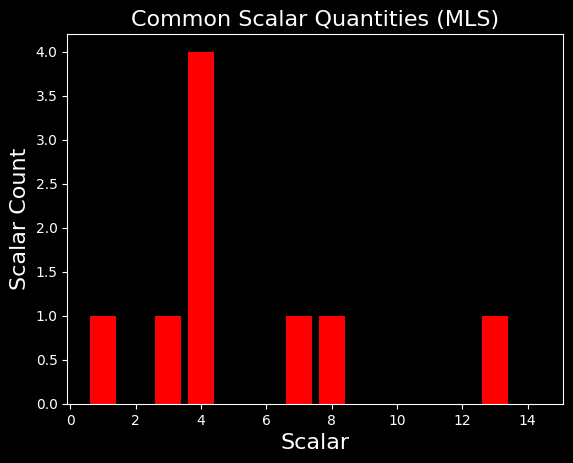

In [118]:
# Bar Chart - Showcase the common scalar quanties over a distribution

plt.style.use('dark_background')
plt.bar(
    x=[i for i in range(1,15)],
    height=[1,0,1,4,0,0,1,1,0,0,0,0,1,0],
    color="red"
    )
plt.title(label="Common Scalar Quantities (MLS)", fontsize=16)
plt.xlabel(xlabel="Scalar", fontsize=16)
plt.ylabel(ylabel="Scalar Count", fontsize=16)
# plt.show()
plt.savefig("common_mls_scalar_quantities.png")

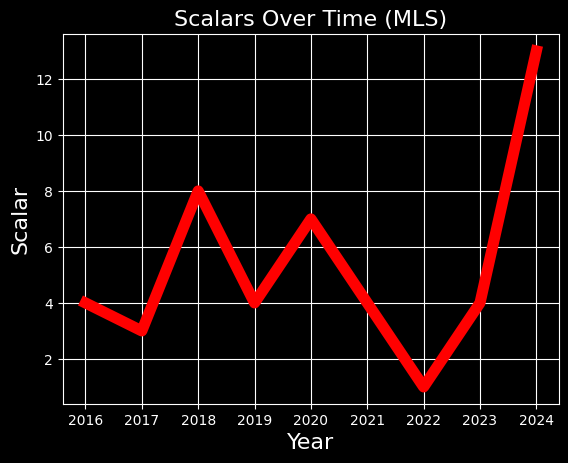

In [119]:
# Line Plot - View the scalers over the past several years

plt.style.use('dark_background')
plt.plot(
    ["2016", "2017", "2018", "2019" ,"2020", "2021", "2022", "2023", "2024"],
    [4,3,8,4,7,4,1,4,13],
    linewidth=8,
    color="red",
    )
plt.title(label="Scalars Over Time (MLS)", fontsize=16)
plt.xlabel(xlabel="Year", fontsize=16)
plt.ylabel(ylabel="Scalar", fontsize=16)
plt.grid()
# plt.show()
plt.savefig("scalars_over_time_mls.png")

In [ ]:

"""
Ad-Hoc Analysis #1: Which scalar produces the smallest error in identifying top MLS players?

After running tests on MVP candidates from 2016 to 2024 using my model, I found that a scalar of 4 most consistently matched the actual MVP finalist lists.

What’s interesting? This scalar strikes a good balance: it’s aggressive enough to highlight the elite tier of players, but not so strict that it misses genuine top performers.

Here are the model’s top picks using scalar = 4

I chose to narrow the final results to approximately the top 2% of players who played at least half the games in a given season.

This 2% corresponds to the upper tail of a normal distribution—specifically, those beyond 2 standard deviations—meaning the players listed below outperformed roughly 98% of their peers.

Here are the final results with the most common scalar (4):


Computed Winners:

2016: # of players: 191
1. alonso	0.959550
2. giovinco	0.894737
3. kljestan	0.732518
4. piatti	0.730500

2017: # of players: 285
1. villa	0.868421
2. roldan	0.862626
3. victor vasquez	0.795477
4. lodeiro	0.790781
5. valeri	0.735149
6. pirez	0.717418

2018: # of players: 283
1. almiron	0.915370
2. martinez	0.887990
3. moralez	0.822278
4. blanco	0.765724
5. sanchez	0.753180
6. vela	0.743590

2019: # of players: 301
1. vela	0.916667
2. ibra	0.709110
3. martinez	0.619006
4. gil	0.615993
5. rossi	0.607093
6. atuesta	0.590606
7. pozuelo	0.576450

2020: # of players: 355
1. reynoso	0.958662
2. lodiero	0.833333
3. pozuelo	0.803132
4. morris	0.791859
5. lod	0.788275
6. valeri	0.787576
7. santos	0.754299
8. nani	0.725287

2021: # of players: 401
1. gil	0.828571
2. muhktar	0.782767
3. paulo	0.770837
4. rusnak	0.751933
5. moreno	0.735519
6. castellanos	0.728406
7. davis	0.728406
8. chara	0.722771
9. moralez	0.715152

2022: # of players: 393
1. driussi	0.917671
2. gil	0.891892
3. muhktar	0.887176
4. gazdag	0.840534
5. acosta	0.801802
6. wagner	0.800868
7. vela	0.766432
8. reynoso	0.734066
9. zelarayan	0.730342

2023: # of players: 382
1. gil	0.894737
2. acosta	0.869373
3. herrera	0.858252
4. bounga	0.817291
5. almada	0.813335
6. cucho	0.805099
7. a. morris	0.796295
8. barreal	0.793282
9. gauld	0.767889

2024: # of players: 414
1. puig	0.819220
2. pec	0.812233
3. acosta	0.740534
4. gauld	0.734151
5. bounga	0.694196
6. evander	0.681925
7. bogusz	0.676271
8. torres	0.638492
9. rodriguez	0.631289
10. painstil	0.615552




"""

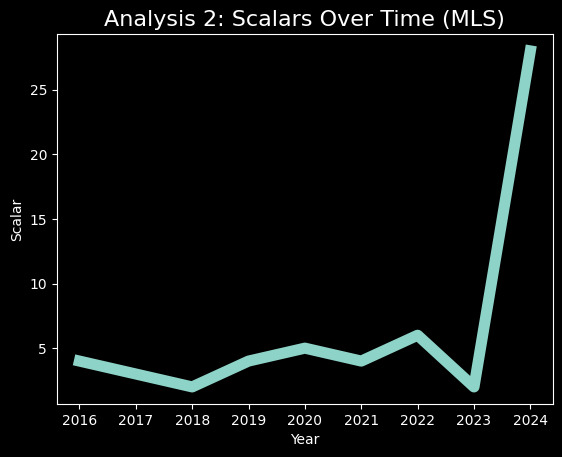

In [4]:
"""
Analysis 2. Which scaler is closest to the ground truth above? Errors don't matter in this case; they just need to match as many players as possible. E.g. two players could be in there correct place, but one may be signifantly wrong.

Optimal scalar for each year:
Analysis 2: 4, 3, 2, 4, 5, 4, 6, 2, 28


Conclusion: The goal for this analysis was to compute as many player ranking matches to the ground truth. This means that if player B was in second place within the actual results and the predicted results then that would be considered a match.


Best Overall Scalar: 4


Computed Winners:
Same as Analysis 1

"""

plt.style.use("dark_background")
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], [4, 3, 2, 4, 5, 4, 6, 2, 28], linewidth=8)
plt.title(label="Analysis 2: Scalars Over Time (MLS)", fontsize=16)
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Scalar")
# plt.show()
plt.savefig("scalars_over_time_mls_analysis_2.png")

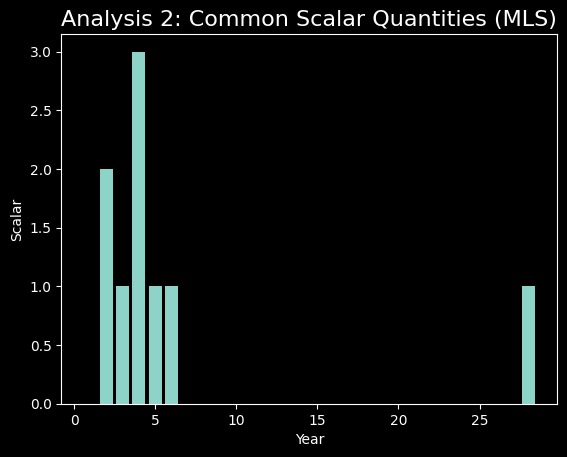

In [5]:

plt.style.use("dark_background")
plt.bar([i for i in range(1,29)], height=[0,2,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
plt.title(label="Analysis 2: Common Scalar Quantities (MLS)", fontsize=16)
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Scalar")
# plt.show()
plt.savefig("common_mls_scalar_quantities_analysis_2.png")

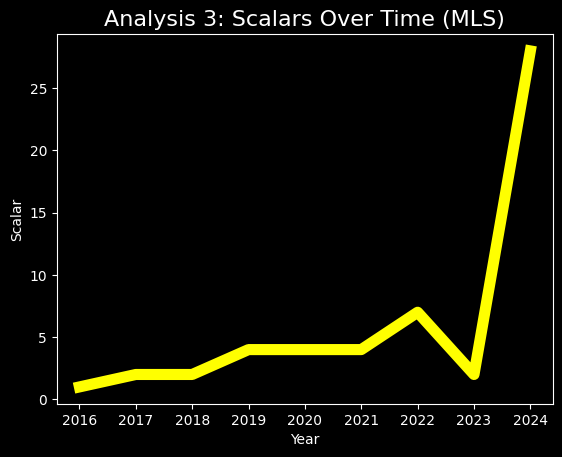

In [6]:
"""
Analysis 3: Determine the scaler to maker sure the first place contender from the ground truth is correct.

Optimal scalar for each year:
Analysis 3: 1, 2, 2, 4, 4, 4, 7, 2, 28


Best Overall Scalar: 4


Computed Winners:
Same as Analysis 1 and 2


"""



plt.style.use("dark_background")
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], [1, 2, 2, 4, 4, 4, 7, 2, 28], color="yellow", linewidth=8)
plt.title(label="Analysis 3: Scalars Over Time (MLS)", fontsize=16)
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Scalar")
# plt.show()
plt.savefig("scalars_over_time_mls_analysis_3.png")

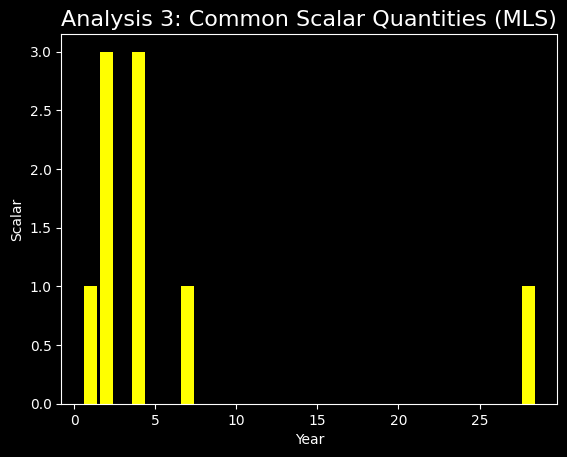

In [7]:


plt.style.use("dark_background")
plt.bar([i for i in range(1,29)], height=[1,3,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1], color="yellow", linewidth=8)
plt.title(label="Analysis 3: Common Scalar Quantities (MLS)", fontsize=16)
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Scalar")
# plt.show()
plt.savefig("common_mls_scalar_quantities_analysis_3.png")

In [8]:
"""
Final Analysis:

Common scalers
A1: 1,3,4,4,4,4,7,8,13 Median: 4
A2: 2, 2, 3, 4, 4, 4, 5, 6, 28 Median: 4
A3: 1, 2, 2, ,2, 4, 4, 4, 7, 28: Median 4


After conducting 3 types of analysis experiments, the most common exponent for scaling up Sports Performance Indicators is 4.
This is under the assumption that SPI's and games played are all you need for conducting a MVP prediction.




"""

"\nFinal Analysis:\n\nCommon scalers\nA1: 1,3,4,4,4,4,7,8,13 Median: 4\nA2: 2, 2, 3, 4, 4, 4, 5, 6, 28 Median: 4\nA3: 1, 2, 2, ,2, 4, 4, 4, 7, 28: Median 4\n\n\nAfter conducting 3 types of analysis experiments, the most common exponent for scaling up Sports Performance Indicators is 4. \nThis is under the assumption that SPI's and games played are all you need for conducting a MVP prediction.\n\n\n\n\n"